In [102]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [103]:
# Importando o arquivo CSV gerado no último cap
df = pd.read_csv('dados/df_eng.csv', index_col = 0)

In [104]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [105]:
df.shape

(10643, 16)

In [106]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio', 'faixa_desconto',
       'performance_faixa_desconto'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10643 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            10643 non-null  int64 
 1   corredor_armazem              10643 non-null  object
 2   modo_envio                    10643 non-null  object
 3   numero_chamadas_cliente       10643 non-null  int64 
 4   avaliacao_cliente             10643 non-null  int64 
 5   custo_produto                 10643 non-null  int64 
 6   compras_anteriores            10643 non-null  int64 
 7   prioridade_produto            10643 non-null  object
 8   genero                        10643 non-null  object
 9   desconto                      10643 non-null  int64 
 10  peso_gramas                   10643 non-null  int64 
 11  entregue_no_prazo             10643 non-null  int64 
 12  performance_prioridade_envio  10643 non-null  object
 13  performance_modo_envi

# Label Encoding 

## Método 1 
Forma manual

In [108]:
# Iniciando pela variável prioridade_produto
df.prioridade_produto.value_counts()

prioridade_produto
baixa    5174
media    4587
alta      882
Name: count, dtype: int64

In [109]:
# Dicionário de mapeamento
dic_prioridade_produto = {'baixa':1,
                         'media': 2,
                         'alta': 0}

In [110]:
# trocando os valores da variável pelos constantes no dicionario
df['prioridade_produto'] = df['prioridade_produto'].map(dic_prioridade_produto)

In [111]:
df.prioridade_produto.value_counts()

prioridade_produto
1    5174
2    4587
0     882
Name: count, dtype: int64

In [112]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,1,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,1,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,1,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,2,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,2,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [113]:
# Variável de Modal envio
df.modo_envio.value_counts()

modo_envio
Navio       7212
Aviao       1728
Caminhao    1703
Name: count, dtype: int64

In [114]:
# Dicionário de mapeamento
dic_modo_envio = {'Navio': 0, 'Aviao': 1, 'Caminhao': 2}

In [115]:
df['modo_envio'] = df['modo_envio'].map(dic_modo_envio)

In [116]:
df.modo_envio.value_counts()

modo_envio
0    7212
1    1728
2    1703
Name: count, dtype: int64

## Método  

Utilizando SCIKIT LEARN

In [117]:
# Variável Categórica Nominal
df.genero.value_counts()

genero
F    5357
M    5286
Name: count, dtype: int64

In [118]:
# Cria o objeto encoder
le = LabelEncoder()

In [119]:
# Treina o objeto (Normalmente é feito somente com os dados treino)
le.fit(df.genero)

LabelEncoder()

In [120]:
list(le.classes_) #Duas categorias

['F', 'M']

In [121]:
# Aplicação do objeto encoder
# (Faz isso com os dados de treino e teste / também em novos dados usados no modelo)

df.genero = le.transform(df.genero)

In [122]:
df.genero.value_counts()

genero
0    5357
1    5286
Name: count, dtype: int64

## One - Hot Encoding  

aplicação de dummys

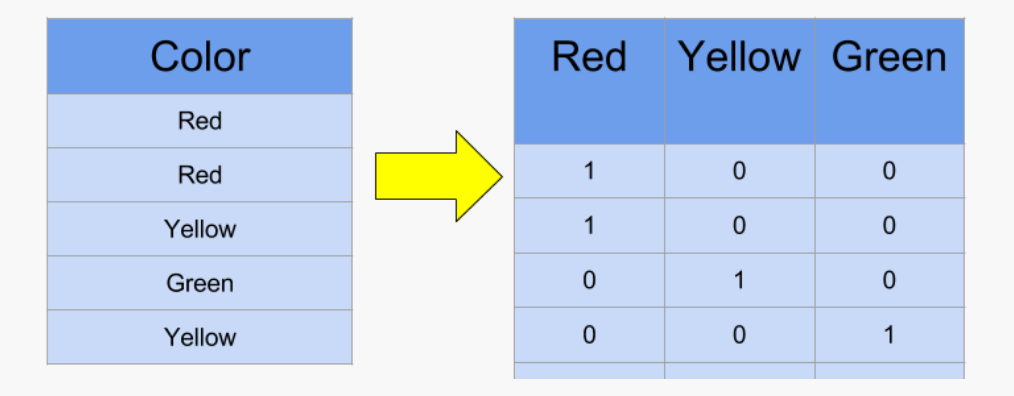

In [123]:
from PIL import Image
Image.open(r"C:\formacao_dataScience_DSA\01_bigData_RealTime_Python_Spark\cap06_Pre_Processamento_de_Dados\dados\one-hot-encoding.png")

In [124]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,1,4,2,177,3,1,0,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,1,4,5,216,2,1,1,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,1,2,2,183,4,1,1,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,1,3,3,176,4,2,1,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,1,2,2,184,3,2,0,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [125]:
# Variável categórica nominal
df.corredor_armazem.value_counts()

corredor_armazem
F    3539
B    1778
D    1777
A    1777
C    1772
Name: count, dtype: int64

In [126]:
# Variável categórica nominal
df.performance_prioridade_envio.value_counts()

performance_prioridade_envio
Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: count, dtype: int64

In [127]:
# Variável categórica nominal
df.performance_modo_envio.value_counts()

performance_modo_envio
Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: count, dtype: int64

In [128]:
# Variável categórica nominal
df.faixa_desconto.value_counts()

faixa_desconto
Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: count, dtype: int64

In [129]:
# Variável categórica nominal
df.performance_faixa_desconto.value_counts()

performance_faixa_desconto
Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: count, dtype: int64

In [130]:
### Aplicando One-Hot Encoding
for cat in ['corredor_armazem',
           'performance_prioridade_envio',
           'performance_modo_envio',
           'faixa_desconto',
           'performance_faixa_desconto']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)
    

In [131]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,D,1,4,2,177,3,1,0,44,...,False,False,False,False,True,False,True,False,False,True
1,2,F,1,4,5,216,2,1,1,59,...,False,False,False,False,True,False,True,False,False,True
2,3,A,1,2,2,183,4,1,1,48,...,False,False,False,False,True,False,True,False,False,True
3,4,B,1,3,3,176,4,2,1,10,...,False,False,False,False,True,True,False,False,True,False
4,5,C,1,2,2,184,3,2,0,46,...,False,False,False,False,True,False,True,False,False,True


In [139]:
# Dropar as colunas que não serão mais uteis
df = df.drop(columns = ['corredor_armazem',
           'performance_prioridade_envio',
           'performance_modo_envio',
           'faixa_desconto',
           'performance_faixa_desconto'])

In [140]:
df = df.drop(columns = ['ID'])

In [141]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,0,0,1,0,1,0,0,1


In [142]:
df.columns

Index(['modo_envio', 'numero_chamadas_cliente', 'avaliacao_cliente',
       'custo_produto', 'compras_anteriores', 'prioridade_produto', 'genero',
       'desconto', 'peso_gramas', 'entregue_no_prazo', 'corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'performance_prioridade_envio_Atraso Crítico',
       'performance_prioridade_envio_Atraso Problemático',
       'performance_prioridade_envio_Atraso Tolerável',
       'performance_prioridade_envio_Não Houve Atraso',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Navio',
       'performance_m

In [143]:
concerto = ['corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'performance_prioridade_envio_Atraso Crítico',
       'performance_prioridade_envio_Atraso Problemático',
       'performance_prioridade_envio_Atraso Tolerável',
       'performance_prioridade_envio_Não Houve Atraso',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Navio',
       'performance_modo_envio_Atraso Tolerável na Entrega Por Aviao',
       'performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Tolerável na Entrega Por Navio',
       'performance_modo_envio_Não Houve Atraso',
       'faixa_desconto_Desconto Abaixo da Media',
       'faixa_desconto_Desconto Acima da Media',
       'performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media',
       'performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media',
       'performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media']

In [144]:
len(concerto)

24

In [145]:
# Repetição para trocar os valores das novas colunas do dummie, pois o jupyter 
# deixou todas elas com valores True / False e não 0 / 1
for x in concerto:
    df[x] = np.where(df[x] == True, 1,0)

In [146]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,0,0,1,0,1,0,0,1


# Pré processamento de variáveis numéricas

In [149]:
df.head() # Dados em escalas diferentes

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,0,0,1,0,1,0,0,1


## FEATURE SCALING

- Dimensionamento de recursos (Feature Scaling) consiste em transformar o valor dos recursos em uma faixa semelhante, para que os algorítmos de machine learning se comportem melhor
- **Padronização** e a **Normalização** são duas técnicas mais comuns para dimensionamento de recursos
- Normalização é transformar os valores dos recursos para que caiam dentro dos intervalos limitados (min e max)
- Padronização é transformar os valores de recursos para cair em torno da média como 0 e com desvio padrão como 1
- A padronização mantém informações úteis sobre valores discrepantes e torna o algorítmo menos sensível a eles, em contraste com o dimensionamento mínimo-máximo
- A classe MinMaxScaler() de sklearn.preprocessing é usada para normalização de recursos
- A classe SandardScaler() de sklearn.preprocessing é usada para padronização de recursos

In [151]:
df.peso_gramas.sample(5)

7459     1646
9250     5487
9043     5274
10081    4305
4075     4663
Name: peso_gramas, dtype: int64

In [156]:
# Utilizando fit_transform para treinar e já modelar 
# Reshape para deixar o array em apenas uma dimensão e gravar o resultado na própria variável
df['peso_gramas'] = MinMaxScaler().fit_transform(df['peso_gramas'].values.reshape(len(df), 1))

In [157]:
df.peso_gramas.sample(5)

5689     0.538057
10369    0.535720
1590     0.263258
6701     0.671439
8655     0.095252
Name: peso_gramas, dtype: float64

In [158]:
df.custo_produto.sample(5)

9026     162
5769     244
10451    248
3564     263
8576     224
Name: custo_produto, dtype: int64

In [159]:
df['custo_produto'] = MinMaxScaler().fit_transform(df['custo_produto'].values.reshape(len(df), 1))

In [160]:
df.custo_produto.sample(5)

4767    0.457944
1073    0.242991
4719    0.439252
3392    0.934579
7031    0.135514
Name: custo_produto, dtype: float64

In [161]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,0.378505,3,1,0,44,0.033893,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,0.560748,2,1,1,59,0.304894,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,0.406542,4,1,1,48,0.346676,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,0.373832,4,2,1,10,0.025712,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,0.411215,3,2,0,46,0.216654,1,...,0,0,0,0,1,0,1,0,0,1


#### Aplicando Padronização para as outras variáveis numéricas

In [163]:
df.desconto.sample(3)

4152    10
8863     2
4406     5
Name: desconto, dtype: int64

In [165]:
df['desconto'] = StandardScaler().fit_transform(df['desconto'].values.reshape(len(df), 1))

In [167]:
df.desconto.sample(10)

6453   -0.568868
2014    2.499586
5450   -0.235340
1404    2.566292
2778    0.298304
9924   -0.168635
4265   -0.235340
924     1.899236
6189   -0.635573
4924   -0.368751
Name: desconto, dtype: float64

In [169]:
df['numero_chamadas_cliente'] = StandardScaler().fit_transform(df['numero_chamadas_cliente'].values.reshape(len(df), 1))

In [170]:
df['numero_chamadas_cliente'].sample(5)

2901   -0.057348
3912   -0.057348
8692   -0.057348
108    -0.057348
5392   -1.803706
Name: numero_chamadas_cliente, dtype: float64

In [171]:
df['avaliacao_cliente'] = StandardScaler().fit_transform(df['avaliacao_cliente'].values.reshape(len(df), 1))

In [172]:
df['compras_anteriores'] = StandardScaler().fit_transform(df['compras_anteriores'].values.reshape(len(df), 1))

In [173]:
df.head(5)

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,-0.057348,-0.700376,0.378505,-0.359702,1,0,2.099353,0.033893,1,...,0,0,0,0,1,0,1,0,0,1
1,1,-0.057348,1.423904,0.560748,-1.135605,1,1,3.099936,0.304894,1,...,0,0,0,0,1,0,1,0,0,1
2,1,-1.803706,-0.700376,0.406542,0.416201,1,1,2.366175,0.346676,1,...,0,0,0,0,1,0,1,0,0,1
3,1,-0.930527,0.007718,0.373832,0.416201,2,1,-0.168635,0.025712,1,...,0,0,0,0,1,1,0,0,1,0
4,1,-1.803706,-0.700376,0.411215,-0.359702,2,0,2.232764,0.216654,1,...,0,0,0,0,1,0,1,0,0,1


## Salvando o dataset final e PROCESSADO em disco

In [174]:
df.to_csv('dados/dataset_final.csv', sep=',', encoding = 'utf-8')